In [1]:
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0-dlenv_tfe
tensorboard2.1.1
seaborn0.10.0
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1745403763852188607,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15854573285140446876
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 454021068878520165
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14728907981
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4640174983859971901
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="../input/dataset"
test_path= os.path.join(data_dir, 'test_set')
train_path= os.path.join(data_dir, 'training_set')
os.listdir(train_path)

['.DS_Store', 'dogs', 'cats']

In [3]:

cat_image = train_path + '/cats/' + os.listdir(train_path + '/cats')[0]
imread(cat_image).shape
# plt.imshow(imread(cat_image))

(374, 500, 3)

'../input/dataset/training_set/dogs/dog.1994.jpg'

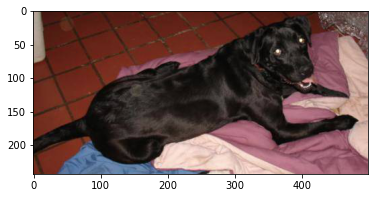

In [4]:
dog_image = train_path + '/dogs/' + os.listdir(train_path + '/dogs/')[5]
plt.imshow(imread(dog_image))
dog_image

In [5]:
# len(os.listdir(train_path + '/dogs'))

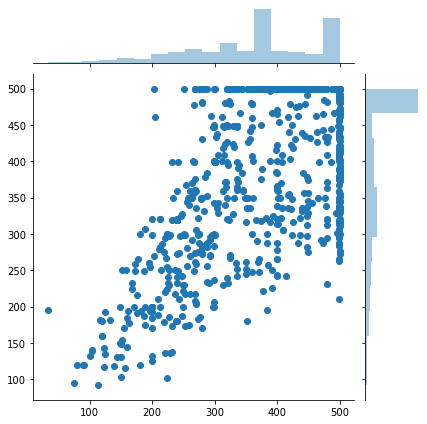

In [6]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path + '/dogs/'):
    img = imread(test_path+'/dogs/' + image_filename)
#     print (train_path+'\\dogs\\' + image_filename)
    d1,d2, _ = img.shape
    dim1.append(d1)
    dim2.append(d2)
sns.jointplot(dim1, dim2)

In [7]:
# np.mean(dim2)
# imread(dog_image).shape
image_shape =(300, 300, 3)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, rescale =1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
test_gen = ImageDataGenerator(rescale =1./255)

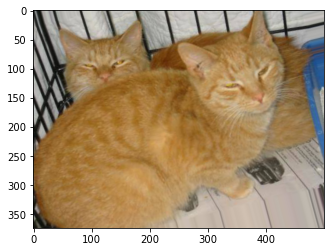

In [9]:
plt.imshow(imread(cat_image))
cat_image
plt.imshow(train_gen.random_transform(imread(cat_image)))

In [10]:
# image_gen.flow_from_directory(train_path)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
batch_size=32

train_image_gen= train_gen.flow_from_directory(train_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary')

test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary')

train_image_gen.class_indices

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten


import keras_resnet.models
import keras

# x = keras.layers.Input(image_shape)
# base_model = keras_resnet.models.ResNet50(x, classes=1)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())


# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D, BatchNormalization
# from keras.models import Sequential,Model,load_model
# from keras import applications




# model = Sequential()

# model.add(applications.ResNet50(include_top=False, pooling=None, input_shape=image_shape))
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(1, activation='sigmoid'))

# model.layers[0].trainable = False



# base_model = applications.ResNet152V2(weights= None, include_top=False, input_shape= image_shape)
# x = base_model.output
# # x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
# x = Dense(1024, activation = 'relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(1, activation= 'sigmoid')(x)
# model = Model(inputs = base_model.input, outputs = predictions)

from tensorflow.keras.optimizers import SGD, Adam
opt = Adam(lr=0.0001)
# opt = SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

results = model.fit_generator(train_image_gen, epochs=100, verbose = 1, validation_data=test_image_gen, callbacks=[early_stop])

Using TensorFlow backend.


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/100
250/250 [==============================] - 168s 674ms/step - loss: 0.6970 - accuracy: 0.5049 - val_loss: 0.6814 - val_accuracy: 0.5380
Epoch 2/100
250/250 [==============================] - 167s 670ms/step - loss: 0.6649 - accuracy: 0.5841 - val_loss: 0.6239 - val_accuracy: 0.6635
Epoch 3/100
250/250 [==============================] - 167s 667ms/step - loss: 0.6209 - accuracy: 0.6553 - val_loss: 0.5570 - val_accuracy: 0.7135
Epoch 4/100
250/250 [==============================] - 166s 665ms/step - loss: 0.5843 - accuracy: 0.6916 - val_loss: 0.5556 - val_accuracy: 0.7175
Epoch 5/100
250/250 [==============================] - 164s 657ms/step - loss: 0.5606 - accuracy: 0.7134 - val_loss: 0.5208 - val_accuracy: 0.7410
Epoch 6/100
250/250 [==============================] - 167s 666ms/step - loss: 0.5459 - accuracy

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0

In [14]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
         

In [15]:


# model.fit(X_train, Y_train, epochs = 100, batch_size = 64)

In [16]:
history = results.history
history


{'loss': [0.6970028421878814,
  0.6648695542812347,
  0.6208781932592392,
  0.5842510859966278,
  0.5605525678396225,
  0.5458900853395462,
  0.5217704051733016,
  0.5080603461265564,
  0.4961149940490723,
  0.4801341332793236,
  0.47232393801212313,
  0.45872321861982346,
  0.45058845126628877,
  0.44181375634670256,
  0.4301593335270882,
  0.4245645079612732,
  0.41719339275360107,
  0.4044103928804398,
  0.40469301980733874,
  0.3911210067272186,
  0.38707141453027727,
  0.379456368625164,
  0.3763331316113472,
  0.3713257528543472,
  0.3634648465514183,
  0.35886803930997846,
  0.35342247095704077,
  0.3472215783596039,
  0.3370487564206123,
  0.3411610978543758,
  0.33975274789333343,
  0.32801060169935226,
  0.33032933846116064,
  0.31806435629725455,
  0.31652979761362077,
  0.3090235005915165,
  0.3082856144309044,
  0.3132408798933029,
  0.3067546798288822,
  0.29011284238100055,
  0.29448923406004907,
  0.29272873827815055,
  0.2804716650545597,
  0.2854155886471271],
 'accur

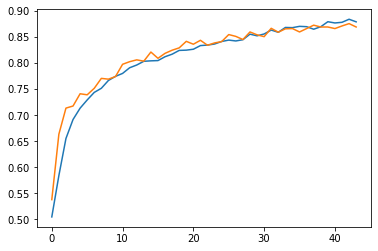

In [17]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

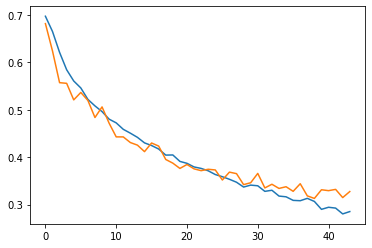

In [18]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

In [19]:
model.evaluate_generator(train_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.26198635467886927, 0.88875]

In [20]:
pred = model.predict_generator(train_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [21]:
predictions = pred > 0.5

In [22]:
pred
len(pred)

8000

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_image_gen.classes, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [2000, 8000]

In [ ]:
confusion_matrix(test_image_gen.classes, predictions)

In [ ]:
dog_image

In [ ]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(dog_image, target_size=image_shape)
my_image

In [ ]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape

In [ ]:
my_img_arr = np.expand_dims(my_img_arr, axis =0)
my_img_arr.shape

In [ ]:
model.predict(my_img_arr)

In [ ]:
# ! pip install keras-resnet